In [27]:
import pandas as pd
import glob

## 후보/연도별로 연설 합치기

In [28]:
df = None
for file in glob.glob('./data/to_preprocess/*'):
    df_curr = pd.read_csv(file, index_col=0)
    df_curr["Year"] = int(file.split("\\")[-1][0:4])
    if df is None:
        df = df_curr
    else:
        df = pd.concat([df,df_curr])

ValueError: invalid literal for int() with base 10: 'Nomi'

In [29]:
df

,name,date,speech,elected,Year
0,Charles E. Hughes,"June 10, 1916","['Mr. Chairman and Delegates:', 'I have not de...",0,1916
0,Woodrow Wilson,"September 02, 1916","['Senator James, Gentlemen of the Notification...",1,1916
0,James M. Cox,"August 07, 1920","['Chairman Robinson, and members of the Notifi...",0,1920
0,Warren G. Harding,"July 22, 1920","['Chairman Lodge, Members of the Notification ...",1,1920
0,Calvin Coolidge,"August 14, 1924","['Mr. Chairman, Members of the Committee, Ladi...",1,1924
...,...,...,...,...,...
1,Donald J. Trump,"August 27, 2020",['Thank you very much. Thank you very much. Th...,0,2020
2,Donald J. Trump,"October 13, 2020","['[as prepared for delivery]', '21 days from n...",0,2020
3,Donald J. Trump,"October 30, 2020","['[as prepared for delivery]', 'Your far-left ...",0,2020
4,Donald J. Trump,"November 05, 2020","[""Good evening. I'd like to provide the Americ...",0,2020


## 연도 분포 확인

<Axes: xlabel='Year'>

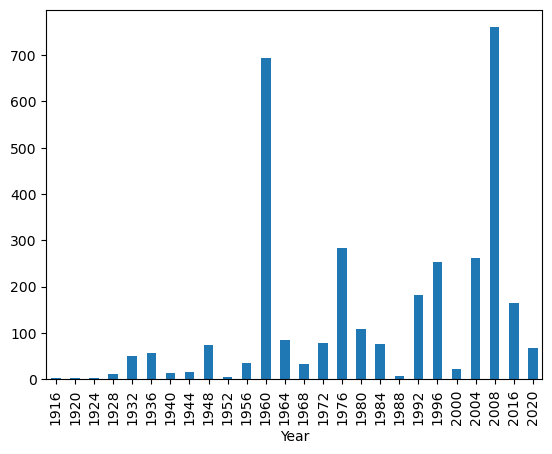

In [57]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

df.groupby("Year")["Year"].value_counts().plot.bar(ax=ax)
# ax.hist(df["Year"], bins=range(1920,2024,4))

Year
1916      2
1920      2
1924      2
1928     11
1932     51
1936     57
1940     14
1944     15
1948     73
1952      4
1956     34
1960    693
1964     85
1968     33
1972     79
1976    283
1980    108
1984     77
1988      7
1992    182
1996    253
2000     22
2004    262
2008    760
2016    165
2020     67
Name: count, dtype: int64

## 후보별 분포 확인

[Text(0, 0, '            Barack Obama          '),
 Text(1, 0, '            Donald J. Trump          '),
 Text(2, 0, '            Hillary Clinton          '),
 Text(3, 0, '            John F. Kerry          '),
 Text(4, 0, '            John McCain          '),
 Text(5, 0, '            Joseph R. Biden          '),
 Text(6, 0, '            Robert Dole          '),
 Text(7, 0, 'Adlai Stevenson '),
 Text(8, 0, 'Al Smith '),
 Text(9, 0, 'Albert Gore, Jr. '),
 Text(10, 0, 'Alf Landon '),
 Text(11, 0, 'Barry Goldwater '),
 Text(12, 0, 'Calvin Coolidge '),
 Text(13, 0, 'Charles E. Hughes '),
 Text(14, 0, 'Dwight D. Eisenhower '),
 Text(15, 0, 'Franklin D. Roosevelt '),
 Text(16, 0, 'George Bush '),
 Text(17, 0, 'George McGovern '),
 Text(18, 0, 'George W. Bush '),
 Text(19, 0, 'Gerald R. Ford '),
 Text(20, 0, 'Harry S Truman '),
 Text(21, 0, 'Herbert Hoover '),
 Text(22, 0, 'Hubert H. Humphrey '),
 Text(23, 0, 'James M. Cox '),
 Text(24, 0, 'Jimmy Carter '),
 Text(25, 0, 'John F. Kennedy '),
 

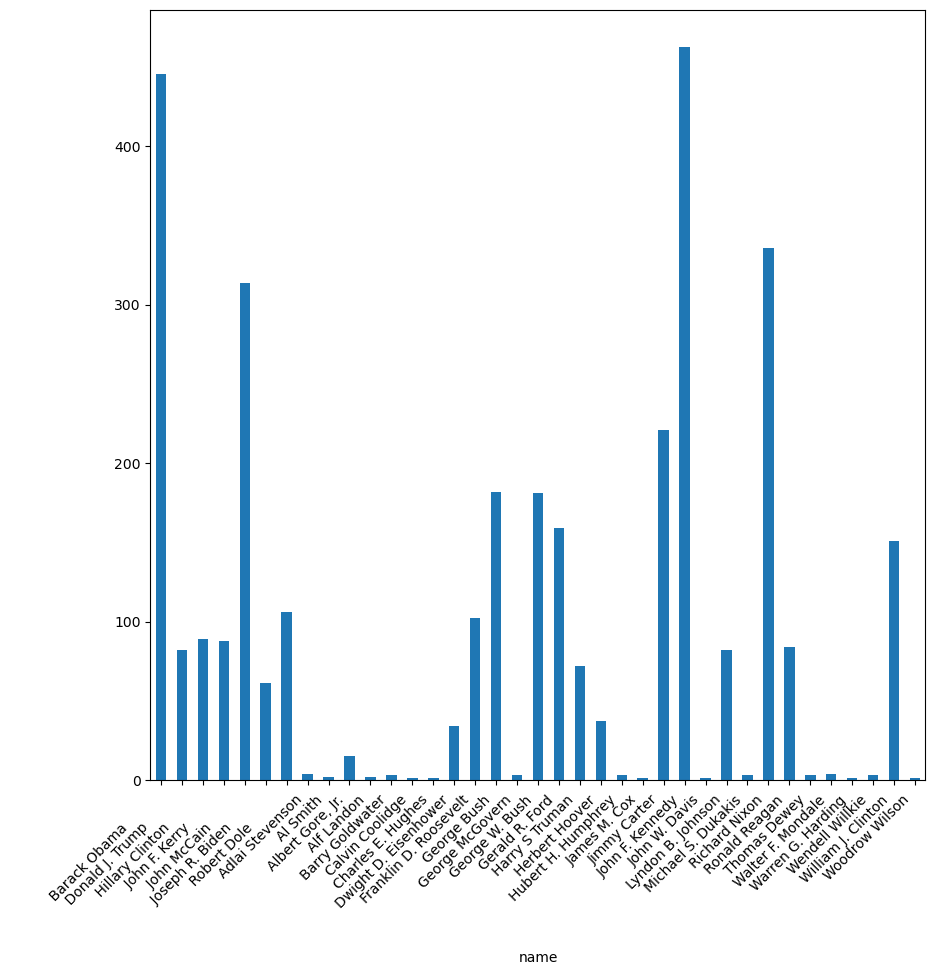

In [56]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

df.groupby("name")["name"].value_counts().plot.bar(ax=ax)
# ax.hist(df["name"])
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()

In [34]:
df["joined_speech"] = df["speech"].apply(lambda l: ' '.join(ast.literal_eval(l)))

## 길이 분포 확인

(array([1201., 1088.,  645.,  295.,   46.,   31.,   20.,    7.,    5.,
           3.]),
 array([   25. ,  1422.4,  2819.8,  4217.2,  5614.6,  7012. ,  8409.4,
         9806.8, 11204.2, 12601.6, 13999. ]),
 <BarContainer object of 10 artists>)

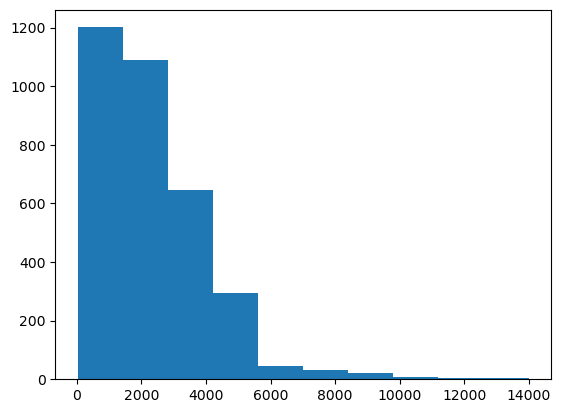

In [36]:
fig, ax = plt.subplots()

ax.hist(df["joined_speech"].apply(lambda l: len(l.split(' '))))

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3341 entries, 0 to 5
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3341 non-null   object
 1   date           3341 non-null   object
 2   speech         3341 non-null   object
 3   elected        3341 non-null   int64 
 4   Year           3341 non-null   int64 
 5   joined_speech  3341 non-null   object
dtypes: int64(2), object(4)
memory usage: 182.7+ KB


In [24]:
import ast
ast.literal_eval(df["speech"].values[0])

['Mr. Chairman and Delegates:',
 'I have not desired the nomination. I have wished to remain on the bench. But in this critical period of our national history I recognize that it is your right to summon and that it is my paramount duty to respond. You speak at a time of national exigency transcending merely partisan consideration.',
 'You voice the demand for a dominant, thorough-going Americanism, with firm, protective upbuilding policies essential to our peace and security, and to that call, in this crisis, I cannot fail to answer with the pledge of all that is in me to the service of our country. Therefore I accept the nomination.',
 'I stand for the firm and unflinching maintenance of all the rights of American citizens on land and sea. I neither impugn motives nor underestimate difficulties. But it is most regrettably true that in our foreign relations we have suffered incalculably from the weak and vacillating course which has been taken with regard to Mexico, a course lamentably

## WordCloud

In [74]:
# !conda install wordcloud -y
from wordcloud import WordCloud


df_test = pd.read_csv('./data/orig/2020_Trump_speech.csv', index_col=0)

speeches = list(map(lambda l: ' '.join(ast.literal_eval(l)), df_test["speech"].values))

speeches_combined = ' '.join(speeches)

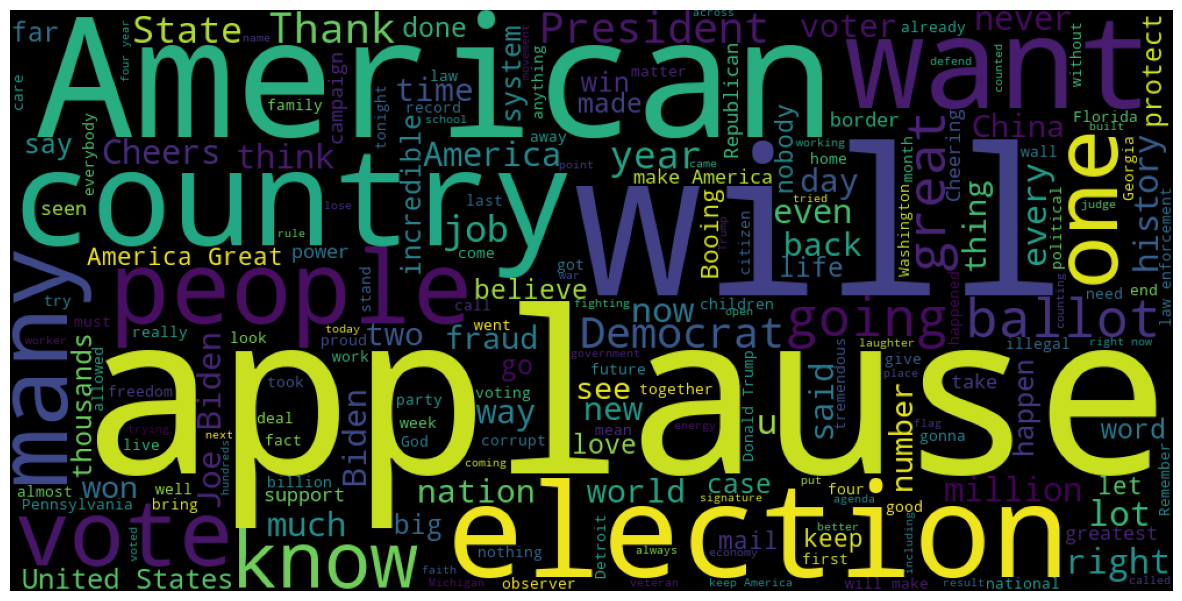

In [75]:
wordcloud = WordCloud(
    background_color = 'black',
    width = 1000, height = 500).generate(speeches_combined)
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.draw()

In [76]:
df_test = pd.read_csv('./data/to_preprocess/2020_Biden_speech_edited.csv', index_col=0)

In [77]:
speeches = list(map(lambda l: ' '.join(ast.literal_eval(l)), df_test["speech"].values))

speeches_combined = ' '.join(speeches)

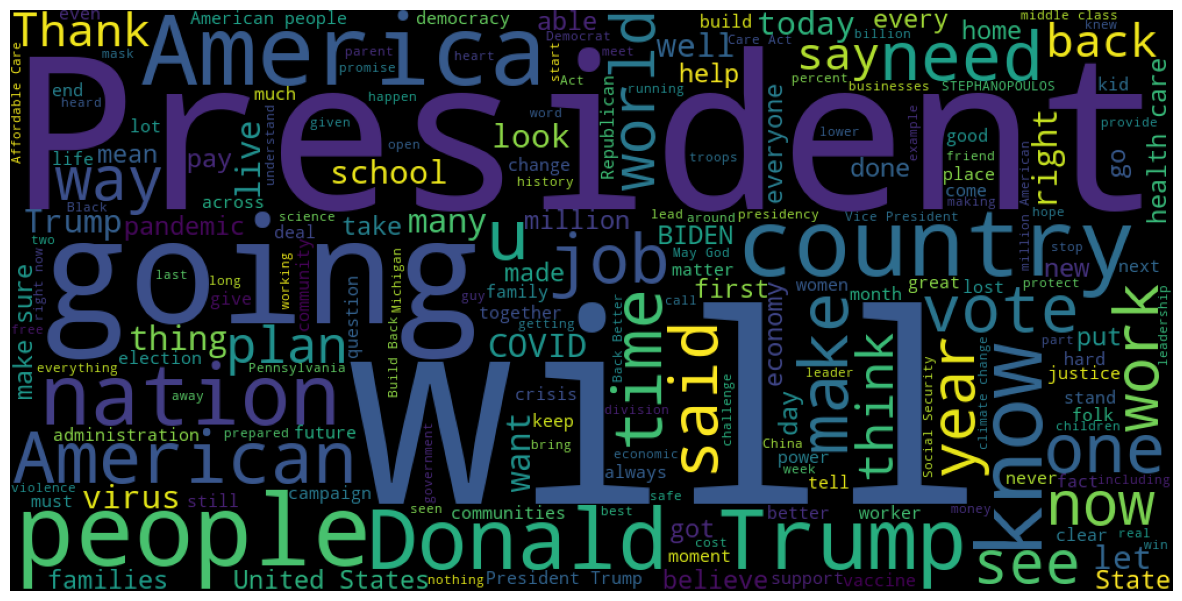

In [78]:
wordcloud = WordCloud(
    background_color = 'black',
    width = 1000, height = 500).generate(speeches_combined)
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.draw()

## LDA

In [ ]:
import re
lambda x: re.sub('[,\.!?]','',x)

lambda x: x.lower()



In [ ]:
import gensim
from gensim_utils import simple_preprocess
import nltk
nltk.download('stopwords')